In [22]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [24]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [4]:
train_acc,train_loss,val_acc,val_loss = read_file('55/')

In [28]:
_5w_1s_training_acc, _5w_1s_training_loss, _5w_1s_val_acc, _5w_1s_val_loss = read_file('mini_5w_1s/')
_5w_5s_training_acc, _5w_5s_training_loss, _5w_5s_val_acc, _5w_5s_val_loss = read_file('mini_5w_5s/')
_10w_1s_training_acc, _10w_1s_training_loss, _10w_1s_val_acc, _10w_1s_val_loss = read_file('mini_10w_1s/')
_10w_5s_training_acc, _10w_5s_training_loss, _10w_5s_val_acc, _10w_5s_val_loss = read_file('mini_10w_5s/')
_15w_1s_training_acc, _15w_1s_training_loss, _15w_1s_val_acc, _15w_1s_val_loss = read_file('mini_15w_1s/')
_15w_5s_training_acc, _15w_5s_training_loss, _15w_5s_val_acc, _15w_5s_val_loss = read_file('mini_15w_5s/')
_20w_1s_training_acc, _20w_1s_training_loss, _20w_1s_val_acc, _20w_1s_val_loss = read_file('mini_20w_1s/')
_20w_5s_training_acc, _20w_5s_training_loss, _20w_5s_val_acc, _20w_5s_val_loss = read_file('mini_20w_5s/')

In [26]:
def draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,save_op=False,alpha=1):

    color_selection = ['b','r','k','m','c','g']
    len_train = int(len(training_acc[0])*alpha)
    len_test = int(len(val_acc[0])*alpha)
    training = np.arange(0, len_train, 1)
    val = np.arange(0, len_train, int(len_train/len_test))
    print(le_name)
    fig = plt.figure(figsize=(25,16))
    fig.suptitle('Training and Validation results on Omniglot dataset', fontsize=24)

    plt.subplot(2, 2, 1)
    for i in range(len(le_name)):
        plt.plot(training, training_loss[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 2)
    for i in range(len(le_name)):
        plt.plot(val, val_loss[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 3)
    for i in range(len(le_name)):
        plt.plot(training, training_acc[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 4)
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)
    for i in range(len(le_name)):
        plt.plot(val, val_acc[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)
    #,prop={'size': 24}
    if save_op:
        fig.savefig('image.jpg')
    plt.show()

('5w_5s', '10w_5s', '15w_5s', '20w_5s')


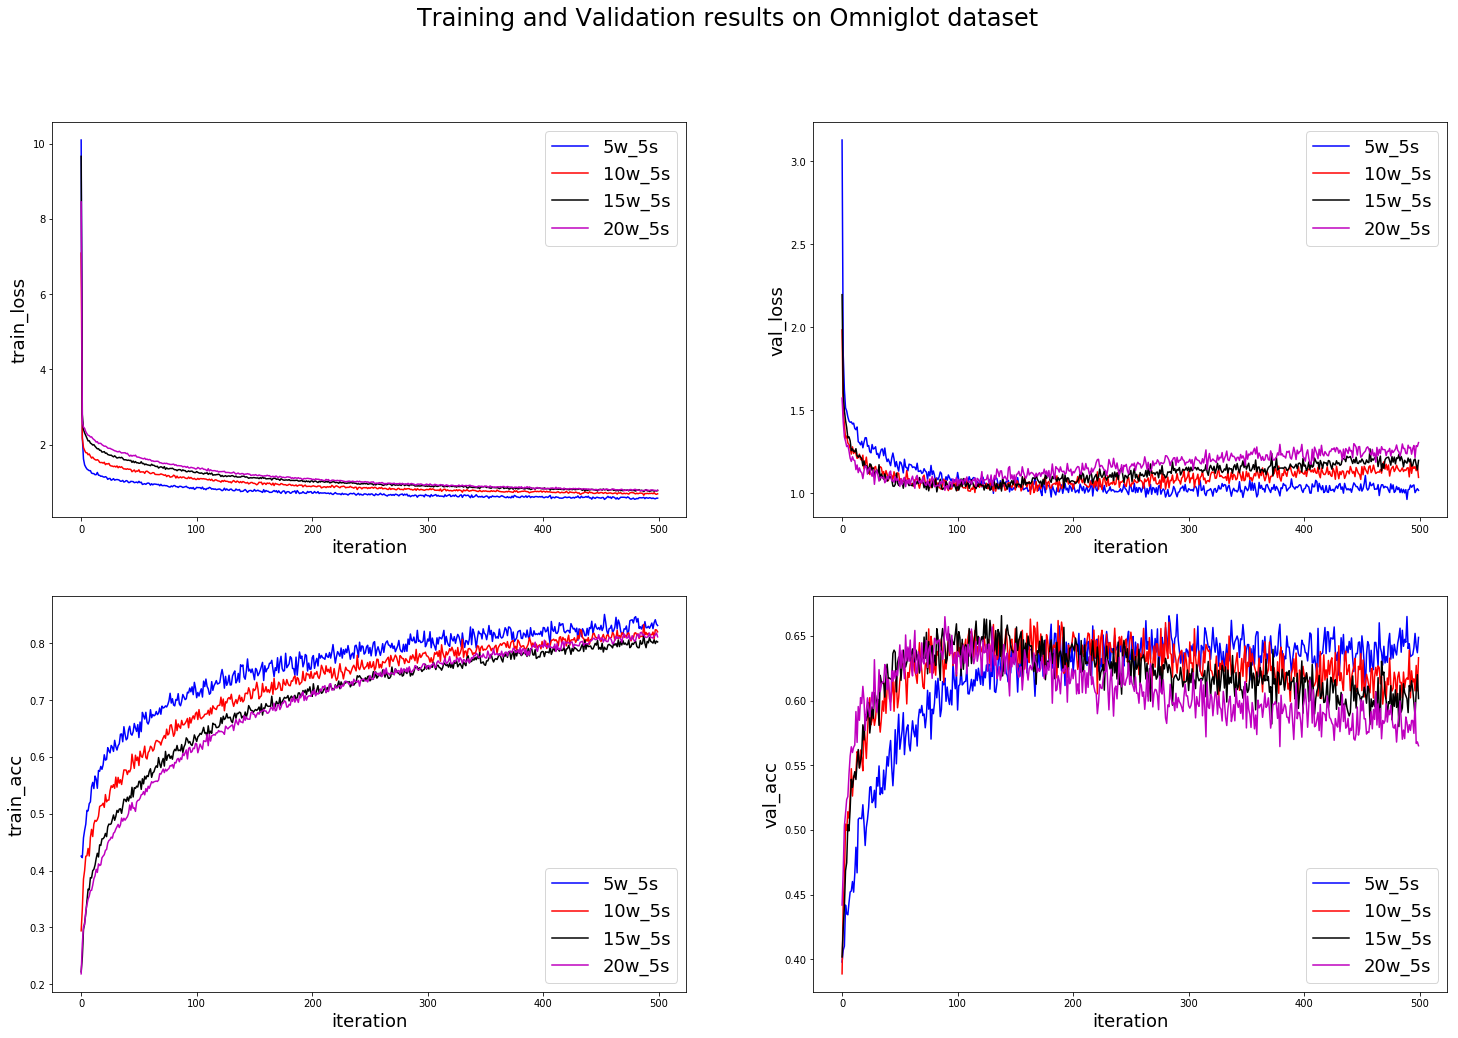

In [30]:
training_loss = [_5w_5s_training_loss,_10w_5s_training_loss,_15w_5s_training_loss,_20w_5s_training_loss]
training_acc = [_5w_5s_training_acc,_10w_5s_training_acc,_15w_5s_training_acc,_20w_5s_training_acc]
val_loss = [_5w_5s_val_loss,_10w_5s_val_loss,_15w_5s_val_loss,_20w_5s_val_loss]
val_acc = [_5w_5s_val_acc,_10w_5s_val_acc,_15w_5s_val_acc,_20w_5s_val_acc]
le_name = ('5w_5s','10w_5s','15w_5s','20w_5s')
draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,save_op=False,alpha=1)

In [35]:
val_acc = [_5w_1s_val_acc,_10w_1s_val_acc,_15w_1s_val_acc,_20w_1s_val_acc]

for i in range(len(val_acc)):
    print(str(le_name[i]),': ', max(val_acc[i]))

5w_5s :  0.48538720713119315
10w_5s :  0.5053198667186679
15w_5s :  0.5030303013445151
20w_5s :  0.4980471423178008


In [21]:
#i is length of list being calculated
for i in range(2,50,2):
    mean,diff,index,interval = return_highest(val_acc,i)
    print('from {} to {}'.format(index,index+interval),mean,diff)

from 54 to 56 0.6536000026762485 0.09148467963095708
from 52 to 56 0.6516333358734846 0.013194400792193917
from 50 to 56 0.6500888912379742 0.007194182943442207
from 48 to 56 0.6466833355650305 0.0072185004152022225
from 47 to 57 0.6450266687870025 0.0062970753391690115
from 50 to 62 0.644788891027371 0.008019832443664332
from 50 to 64 0.6437047635870321 0.006907055742716106
from 47 to 63 0.6431000018119812 0.006073890034376084
from 44 to 62 0.6423777796328068 0.005676340632267296
from 43 to 63 0.6420266682952642 0.005111130361321603
from 41 to 63 0.6413575772941114 0.004830394556952777
from 50 to 74 0.6411500012005368 0.0046637236768350965
from 47 to 73 0.6411333345908385 0.0042985538972462045
from 46 to 74 0.6404190488798278 0.004121467926278544
from 43 to 73 0.6406800012091796 0.0038585238893001916
from 41 to 73 0.6403041678387672 0.0037155530520113222
from 39 to 73 0.6399921579746639 0.0035143825804371254
from 38 to 74 0.6395740752004915 0.0033688787765296935
from 50 to 88 0.638596